# <span style="color: #483D8B">Partie 1 : Exploration des données et comparaison des deux quartiers</span>

## <span style="color:#008B8B">1. Importer les bibliothèques nécessaires </span>

### <span style="color:blue"> 1.1. Importation des bibliothèques : </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### <span style="color:blue"> 1.2. Chargement des données : </span>

In [2]:
data_file = pd.read_csv( r"AmesHousing.csv")
data_file.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## <span style="color:#008B8B"> 2. Exploration des valeurs catégorique </span>

### <span style="color:blue"> 2.1. Identification des différents quartiers </span>

In [3]:
quartiers = data_file['Neighborhood'].unique()
print(quartiers)

['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']


### <span style="color:blue"> 2.2. Observation de la fréquence de chaque quartier </span>

In [4]:
freq_quartiers = data_file['Neighborhood'].value_counts()
print(freq_quartiers)

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64


## <span style="color:#008B8B"> 3. Sélection des deux quartiers les plus représentés </span>

### <span style="color:blue"> 3.1. Identifier que les quartiers les plus fréquents : </span>

In [5]:
top2_quartiers = freq_quartiers.head(2)
print(top2_quartiers)

Neighborhood
NAmes      443
CollgCr    267
Name: count, dtype: int64


### <span style="color:blue"> 3.2. Restreindre l’analyse à ces deux quartiers : </span>

In [6]:
top2_names = top2_quartiers.index
data_top2 = data_file[data_file['Neighborhood'].isin(top2_names)]

## <span style="color:#008B8B"> 4. Analyser les statistiques descriptives </span>

### <span style="color:blue"> 4.1. Regroupement des données par quartier : </span>

In [7]:
grouped_data = data_top2.groupby('Neighborhood')


### <span style="color:blue"> 4.2. Analyse des statistiques descriptives : </span>

In [8]:
stats = grouped_data['SalePrice'].describe()
print(stats)

              count           mean           std       min       25%  \
Neighborhood                                                           
CollgCr       267.0  201803.434457  54187.843749  110000.0  160875.0   
NAmes         443.0  145097.349887  31882.707229   68000.0  127000.0   

                   50%       75%       max  
Neighborhood                                
CollgCr       200000.0  228250.0  475000.0  
NAmes         140000.0  157500.0  345000.0  


### <span style="color:blue"> 4.3. Interprétation des différences : </span>


Mean: Le quartier CollgCr présente un prix de vente moyen de 200 000, supérieur à celui de NAmes (145 000). Cela suggère que CollgCr offre des propriétés plus coûteuses, probablement plus modernes ou plus grandes

Max/Min: CollgCr présente un maximum beaucoup plus élevé que NAmes, ce qui indique la présence de propriétés haut de gamme dans ce quartier

Écart-type (std): CollgCr a un écart-type élevé, ce qui indique une grande variation des prix de vente, tandis que NAmes a des prix plus homogènes et plus abordables.

## <span style="color:#008B8B"> 5. Visualiser et interpréter les résultats </span>

College Creek : moins de ventes, mais prix moyen plus élevé et plus dispersé → maisons variées et plus chères.

North Ames : plus de ventes, prix moyen plus bas et plus homogène → quartier plus abordable.


## <span style="color:#008B8B"> 6. Amélioration de la lisibilité </span>

### Transposition (.T) des statistiques descriptives :

In [9]:
stats_T = stats.T
print(stats_T)

Neighborhood        CollgCr          NAmes
count            267.000000     443.000000
mean          201803.434457  145097.349887
std            54187.843749   31882.707229
min           110000.000000   68000.000000
25%           160875.000000  127000.000000
50%           200000.000000  140000.000000
75%           228250.000000  157500.000000
max           475000.000000  345000.000000


# <span style="color: #483D8B"> Partie 2 : Visualisation des distributions des prix de vente </span>

## <span style="color:#008B8B"> 1. Préparation des données </span>

###### Extraire les prix dans deux séries distinctes

In [10]:
prix_collgcr = data_top2[data_top2['Neighborhood'] == 'CollgCr']['SalePrice']
prix_names = data_top2[data_top2['Neighborhood'] == 'NAmes']['SalePrice']

###### Vérifier la présence de valeurs manquantes

In [11]:
print(prix_collgcr.isnull().sum())
print(prix_names.isnull().sum())

0
0


il n’y a pas de valeurs manquantes → données prêtes à tracer

## <span style="color:#008B8B"> 2. Visualisation des distributions: Histogrammes </span>

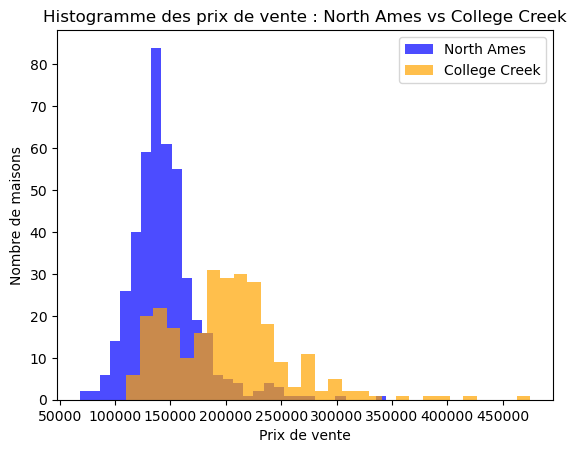

In [12]:
plt.hist(prix_names, bins=30, alpha=0.7, label="North Ames", color='blue')
plt.hist(prix_collgcr, bins=30, alpha=0.7, label="College Creek", color='orange')
# Ajouter les labels et la légende
plt.xlabel("Prix de vente")
plt.ylabel("Nombre de maisons")
plt.title("Histogramme des prix de vente : North Ames vs College Creek")
plt.legend()

#### Interprétation visuelle

College Creek → prix plus élevés et plus dispersés

North Ames → prix plus bas et plus concentrés autour de 145 000 $

## <span style="color:#008B8B"> 3. Visualisation des distributions : Fonction de distribution cumulative (CDF) </span>

In [13]:
def plot_CDF(series, ax=None, label=None):
    df = series.to_frame(name='SalePrice')
    df['CDF'] = df['SalePrice'].rank(pct=True)
    df = df.sort_values('SalePrice')
    df.plot(x='SalePrice', y='CDF', ax=ax, label=label)
    return df

##### Utiliser la fonction

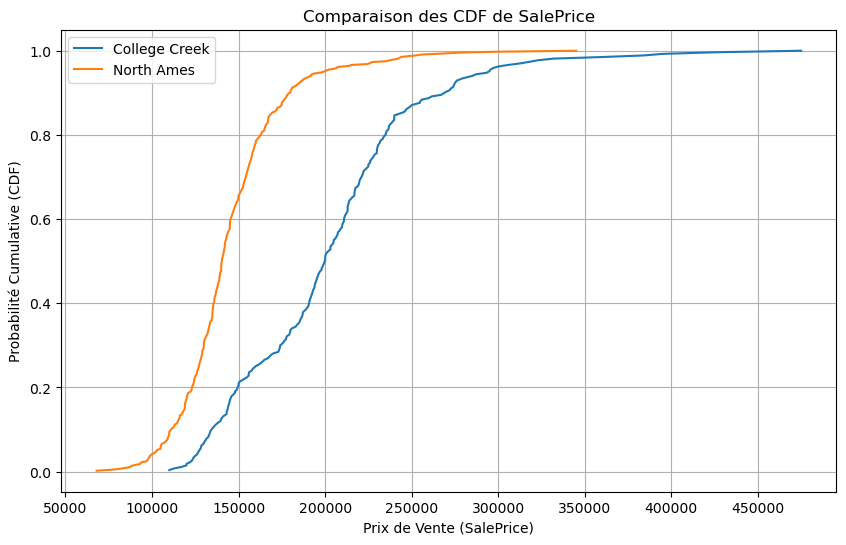

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
cdf_collgcr = plot_CDF(
    series=prix_collgcr, ax=ax,label='College Creek')
cdf_names = plot_CDF(
    series=prix_names, ax=ax,label='North Ames')
ax.set_title("Comparaison des CDF de SalePrice")
ax.set_xlabel("Prix de Vente (SalePrice)")
ax.set_ylabel("Probabilité Cumulative (CDF)")
ax.legend()
plt.grid(True) # afficher la grille
plt.show()

##### Interprétation visuelle

Les courbes s'écartent et cet écart démontre une nette supériorité des prix de vente dans le quartier 'College Creek' par rapport à 'North Ames'

# <span style="color: #483D8B"> Partie 3 : Exécuter un test statistique pour comparer deux distributions </span>


In [15]:
from scipy import stats
resultat=stats.ks_2samp(prix_collgcr,prix_names)
print(resultat)
alpha = 0.05   # seuil de significativité

if resultat.pvalue < alpha:
    print("Les distributions sont significativement différentes (rejeter H0).")
else:
    print("Aucune différence significative entre les distributions (ne pas rejeter H0).")

KstestResult(statistic=np.float64(0.5836609430085982), pvalue=np.float64(3.2892428354379855e-53), statistic_location=np.int64(172500), statistic_sign=np.int8(-1))
Les distributions sont significativement différentes (rejeter H0).


In [16]:
import sys
print(sys.executable)

C:\Users\nassi\anaconda3\python.exe


#### Analyse et conclusion 

Pvalue est extrêmement petite très inférieure à 0.05 Nous rejetons donc l’hypothèse nulle H₀.
Cela indique que les distributions des prix de vente entre North Ames et College Creek sont significativement différentes.
Les deux quartiers ne présentent pas la même distribution de valeurs.

# <span style="color: #483D8B"> Partie 4 : Tester la normalité des distributions </span>


#### Test de Shapiro-Wilk

In [17]:
stat_na, p_na = stats.shapiro(prix_names)
stat_cc, p_cc = stats.shapiro(prix_collgcr)

In [18]:
print("North Ames : Stat =", stat_na, ", p-value =", p_na)
print("College Creek : Stat =", stat_cc, ", p-value =", p_cc)

North Ames : Stat = 0.8932009892779424 , p-value = 5.124904026764063e-17
College Creek : Stat = 0.9278154635655026 , p-value = 4.162976796933535e-10


In [19]:
alpha = 0.05
if p_na < alpha:
     print(f"❌ La distribution du North Ames n'est pas normale (rejet de H₀, p < {alpha}).")
else:
    print(f"✅ La distribution du North Ames peut être considérée comme normale (non-rejet de H₀, p ≥ {alpha}).")


❌ La distribution du North Ames n'est pas normale (rejet de H₀, p < 0.05).


In [20]:
alpha = 0.05
if p_cc < alpha:
     print(f"❌ La distribution du College Creek n'est pas normale (rejet de H₀, p < {alpha}).")
else:
    print(f"✅ La distribution du College Creek peut être considérée comme normale (non-rejet de H₀, p ≥ {alpha}).")

❌ La distribution du College Creek n'est pas normale (rejet de H₀, p < 0.05).


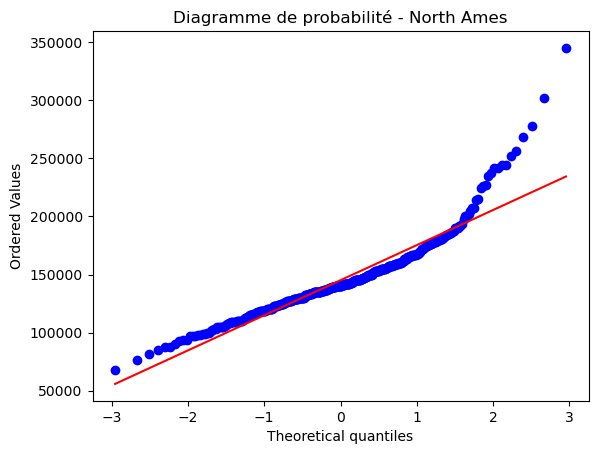

In [21]:
fig, ax = plt.subplots()
stats.probplot(prix_names, plot=ax)
plt.title("Diagramme de probabilité - North Ames")
plt.show()

##### Interpretation

La majorité des points bleus suit très étroitement la ligne droite rouge dans la partie centrale du graphique. Cela indique que le cœur des données est très proche d'une distribution normale. Cependant, la distribution présente une légère asymétrie positive. Cet écart est dû aux prix les plus élevés (les quelques points à droite), qui se situent nettement au-dessus de la ligne et s'écartent donc de la normalité parfaite

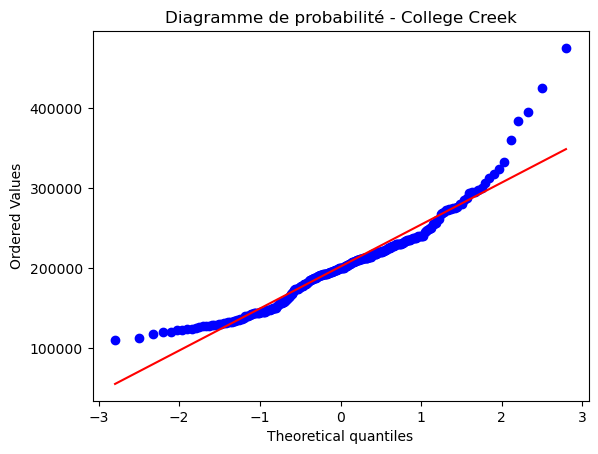

In [22]:
fig, ax = plt.subplots()
stats.probplot(prix_collgcr, plot=ax)
plt.title("Diagramme de probabilité - College Creek")
plt.show()

##### Interpretation

Les points forment une courbe en "S" allongé plutôt qu'une ligne droite. La distribution n'est pas normale et présente une asymétrie positive due aux prix les plus élevés.

#### Compléter par un histogramme

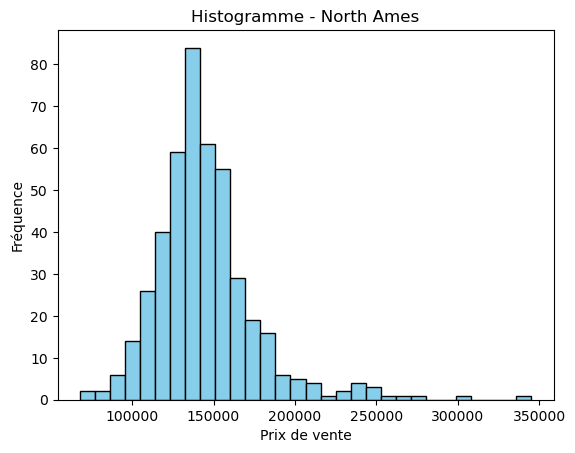

In [23]:
plt.hist(prix_names, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogramme - North Ames")
plt.xlabel("Prix de vente")
plt.ylabel("Fréquence")
plt.show()

L'histogramme présente une forme générale en cloche avec un seul pic (unimodale) centré autour de 140 000 à 150 000 (le prix de vente le plus fréquent). L'histogramme confirme les observations faites avec le QQ-Plot précédent : La distribution des prix à North Ames est principalement normale mais est légèrement déformée vers la droite par l'existence de quelques propriétés vendues à des prix très élevés.

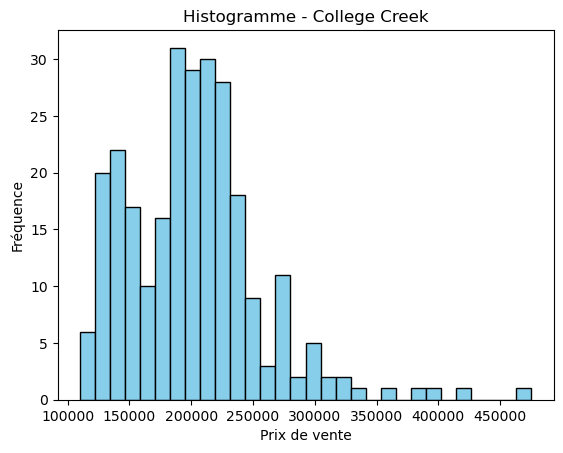

In [24]:
plt.hist(prix_collgcr, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogramme - College Creek")
plt.xlabel("Prix de vente")
plt.ylabel("Fréquence")
plt.show()

##### Interprétation de l'Histogramme - College Creek

L'histogramme des prix de vente pour College Creek confirme visuellement la non-normalité suggérée par le QQ-Plot. Contrairement à North Ames, cet histogramme ne présente pas une forme de cloche lisse et claire. Il est beaucoup plus irrégulier et présente des variations brusques.
La distribution est fortement asymétrique positive (étirement vers la droite). La queue de droite (prix supérieurs à 250 000) est très longue et s'étend jusqu'à 450 000.
La distribution des prix à College Creek est clairement non normale.

# <span style="color: #483D8B"> Partie 5 : Vérification de la répartition en pieds carrés </span>

In [25]:
superficie_north_ames = data_top2[data_top2['Neighborhood'] == 'NAmes']['1st Flr SF']
superficie_college_creek = data_top2[data_top2['Neighborhood'] == 'CollgCr']['1st Flr SF']


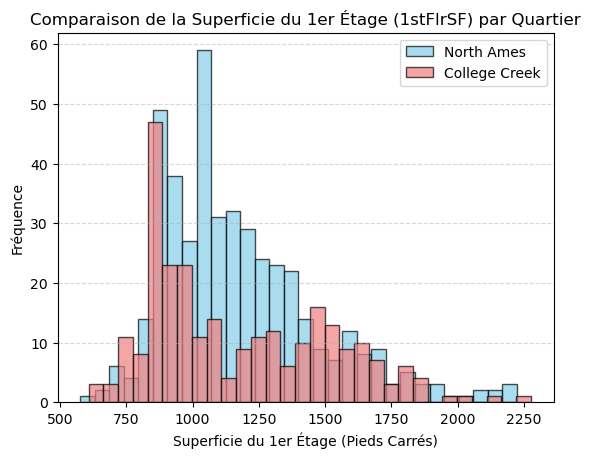

In [26]:
plt.hist(
    superficie_north_ames, 
    bins=30, 
    color='skyblue', 
    alpha=0.7,
    label='North Ames', 
    edgecolor='black'
)

# Histogramme pour College Creek
plt.hist(
    superficie_college_creek, 
    bins=30, 
    color='lightcoral', 
    alpha=0.7,
    label='College Creek', 
    edgecolor='black'
)
plt.title("Comparaison de la Superficie du 1er Étage (1stFlrSF) par Quartier")
plt.xlabel("Superficie du 1er Étage (Pieds Carrés)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()

##### Interpretation

Visuellement, les deux distributions de superficies semblent différentes : elles n'ont pas le même centre et n'ont pas exactement la même forme. North Ames semble avoir une distribution légèrement plus concentrée autour de son pic (1000-1500), tandis que College Creek a une distribution plus dispersée ou étalée sur toute la plage inférieure.

#### Test statistique : Kolmogorov-Smirnov (KS test) 

In [27]:
stat_ks, p_value_ks = stats.ks_2samp(superficie_north_ames, superficie_college_creek)
alpha = 0.05 # Seuil de signification standard

print("--- Résultat du Test de Kolmogorov-Smirnov ---")
print(f"Statistique D (KS) : {stat_ks:.4f}")
print(f"Valeur p : {p_value_ks:.4f}")

# --- Interprétation ---
if p_value_ks < alpha:
    print(f"Conclusion : Rejet de H₀, car p < {alpha}.")
    print("Les deux distributions (Superficie 1stFlrSF) sont significativement différentes.")
    print("Ceci confirme l'observation visuelle des histogrammes.")
else:
    print(f"Conclusion : Non-rejet de H₀, car p ≥ {alpha}.")
    print("Les deux distributions peuvent être considérées comme provenant de la même population.")

--- Résultat du Test de Kolmogorov-Smirnov ---
Statistique D (KS) : 0.1530
Valeur p : 0.0007
Conclusion : Rejet de H₀, car p < 0.05.
Les deux distributions (Superficie 1stFlrSF) sont significativement différentes.
Ceci confirme l'observation visuelle des histogrammes.


En conclusion, les maisons de College Creek et North Ames ne partagent pas la même distribution de surface de premier étage.

Cette différence statistiquement significative confirme qu'il existe des différences structurelles, de standing ou de conception entre les types de logements vendus dans ces deux zones résidentielles

# <span style="color: #483D8B">Optimisation des données pour la modélisation </span>


Correction de l'Asymétrie
Face à la non-normalité observée (particulièrement à College Creek), une solution robuste a été appliquée :

Problème : Les distributions étalées à droite biaisent les modèles prédictifs linéaires.
Solution : Application de la fonction logarithme naturel 
ln(x).
Résultat : Les valeurs extrêmes sont "comprimées", rapprochant la distribution d'une courbe normale idéale, rendant les données prêtes pour des algorithmes de Machine Learning avancés.

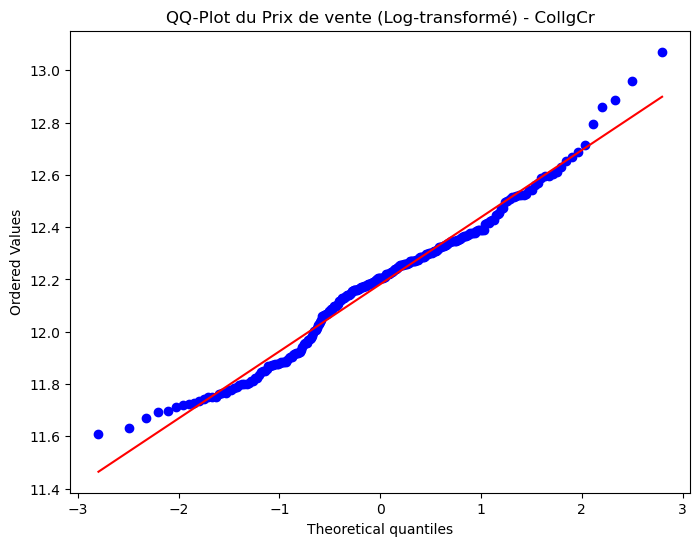

Statistique de test: 0.9803
Valeur p: 0.0009
❌ Conclusion : Rejet de H₀. La transformation n'a pas suffi à atteindre la normalité parfaite.


In [29]:
# Création de la nouvelle variable transformée ---

# Nous appliquons le logarithme népérien (np.log) à la colonne des prix
data_top2_normalisation = data_top2.copy()
data_top2_normalisation['Log_SalePrice'] = np.log(data_top2_normalisation['SalePrice'])
log_prix_CollgCr = data_top2_normalisation[data_top2_normalisation['Neighborhood'] == 'CollgCr']['Log_SalePrice']
# Visualisation : QQ-Plot des prix transformés
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(log_prix_CollgCr, plot=ax)
ax.set_title("QQ-Plot du Prix de vente (Log-transformé) - CollgCr")
plt.show()
# Test Statistique : Test de Shapiro-Wilk sur données transformées ---

stat_log, p_value_log = stats.shapiro(log_prix_CollgCr)
alpha = 0.05

print(f"Statistique de test: {stat_log:.4f}")
print(f"Valeur p: {p_value_log:.4f}")

if p_value_log >= alpha:
    print(f"✅ Conclusion : Non-rejet de H₀. La distribution transformée est considérée comme Normale.")
else:
    print(f"❌ Conclusion : Rejet de H₀. La transformation n'a pas suffi à atteindre la normalité parfaite.")

Face à l'asymétrie positive observée dans la distribution des prix de vente, j'ai appliqué une transformation logarithmique ln(x) afin de stabiliser la variance et de rapprocher la distribution d'une forme normale, condition essentielle pour l'utilisation de modèles paramétriques comme la régression linéaire.

Interprétation et Nuance : 
La majorité des points bleus suit désormais très étroitement la ligne de référence rouge. L'asymétrie a été quasiment éliminée, la distribution est devenue largement plus symétrique.
Rejet Technique : Cependant, la valeur p (0.0009) est inférieure au seuil de 0.05. Cela force à rejeter formellement l'hypothèse de normalité.

Conclusion pratique :
Pour le Data Scientist, cette transformation est une réussite totale. Elle a corrigé le défaut majeur de la distribution. Le rejet formel doit être noté, mais il ne remet pas en cause l'utilisation des prix log-transformés pour une future régression linéaire, car les modèles sont généralement tolérants aux légères déviations dans les queues.

# <span style="color: #483D8B">Analyse Bivariée et Force de la Relation Prix/Surface </span>


--- Corrélation Prix vs Surface ---
North Ames (NAmes)   : r = 0.5212 (p-value = 3.2257e-32)
College Creek (CollgCr): r = 0.6273 (p-value = 1.3025e-30)


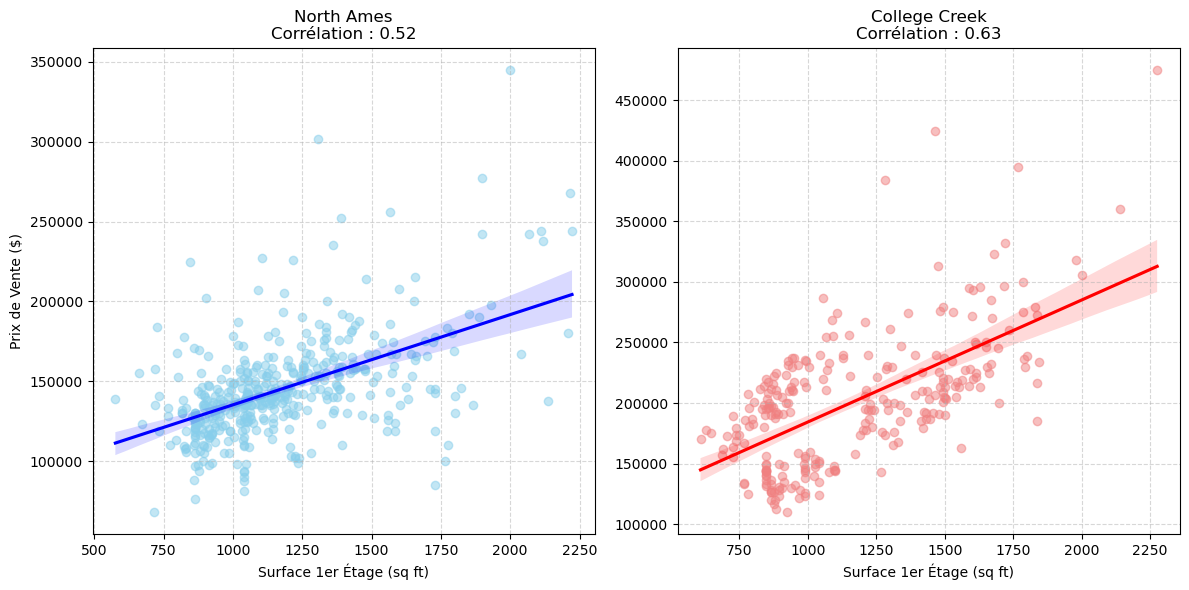

In [30]:
import seaborn as sns
# 1. Extraction propre des données (Prix et Surface) pour les deux quartiers
df_names = data_top2[data_top2['Neighborhood'] == 'NAmes'][['SalePrice', '1st Flr SF']].copy()
df_collg = data_top2[data_top2['Neighborhood'] == 'CollgCr'][['SalePrice', '1st Flr SF']].copy()
# 2. Calcul des Coefficients de Corrélation de Pearson
r_names, p_names = stats.pearsonr(df_names['1st Flr SF'], df_names['SalePrice'])
r_collg, p_collg = stats.pearsonr(df_collg['1st Flr SF'], df_collg['SalePrice'])
print(f"--- Corrélation Prix vs Surface ---")
print(f"North Ames (NAmes)   : r = {r_names:.4f} (p-value = {p_names:.4e})")
print(f"College Creek (CollgCr): r = {r_collg:.4f} (p-value = {p_collg:.4e})")

# 3. Visualisation : Nuages de points avec ligne de régression
plt.figure(figsize=(12, 6))
# Graphique pour North Ames
plt.subplot(1, 2, 1)
sns.regplot(x='1st Flr SF', y='SalePrice', data=df_names, 
            scatter_kws={'alpha':0.5, 'color':'skyblue'}, line_kws={'color':'blue'})
plt.title(f"North Ames\nCorrélation : {r_names:.2f}")
plt.xlabel("Surface 1er Étage (sq ft)")
plt.ylabel("Prix de Vente ($)")
plt.grid(True, linestyle='--', alpha=0.5)

# Graphique pour College Creek
plt.subplot(1, 2, 2)
sns.regplot(x='1st Flr SF', y='SalePrice', data=df_collg, 
            scatter_kws={'alpha':0.5, 'color':'lightcoral'}, line_kws={'color':'red'})
plt.title(f"College Creek\nCorrélation : {r_collg:.2f}")
plt.xlabel("Surface 1er Étage (sq ft)")
plt.ylabel("") # On enlève le label Y pour ne pas surcharger
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Objectif :Après avoir analysé les distributions individuellement, nous avons cherché à comprendre si la superficie du premier étage (1stFlrSF) était un bon prédicteur du prix de vente (SalePrice) et si cette relation variait selon le standing du quartier.Méthodologie :Nous avons utilisé le coefficient de corrélation de Pearson (r) pour quantifier la force de la relation linéaire entre la surface et le prix


#### Interprétation de la Corrélation Prix de Vente vs Surface

Corrélation positive et significative 
North Ames ($r=0.52$) et College Creek ($r=0.63$) :Dans les deux quartiers, le coefficient de corrélation de Pearson (r) est positif. Cela confirme la logique fondamentale de l'immobilier : plus la surface d'une maison augmente, plus son prix de vente augmente également.Les deux valeurs (0.52 et 0.63) indiquent une relation linéaire allant de modérée à forte.

Impact des Valeurs Extrêmes (Outliers):
Visuellement, le nuage de points de College Creek (à droite) semble plus "montant", mais il y a des points avec des prix très élevés (autour de 400,000) pour des surfaces relativement petites.Ces valeurs extrêmes, ainsi que la forte asymétrie initiale des prix (que nous avons corrigée avec le log), sont la raison pour laquelle la corrélation est plus faible qu'elle ne le devrait d'un point de vue prédictif. Le prix brut est "tiré" par ces valeurs aberrantes.

Cette analyse confirme que la surface est un excellent prédicteur. Cependant, pour obtenir une corrélation encore plus forte et plus fiable pour la modélisation, nous avons déjà pris la bonne décision en utilisant le Log(prix).
L'utilisation du Log(prix) permet de :

-Neutralise l'impact disproportionné des prix extrêmes.

-Vérifier la force réelle de la relation linéaire après avoir satisfait les hypothèses de normalité.

Il est donc crucial de baser la future régression sur la corrélation utilisant la variable Log(prix).